In [123]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps

In [133]:
#Reading in Hotel Data and Showing the info of data
hotelData = pd.read_csv("hotel_bookings.csv")
hotelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [134]:
#Cleaning the data to remove abnormality were abies or children are in hotel room without any adults or the total family size is 0
hotelData = ps.sqldf("Select * from hotelData where adults != 0")

In [135]:
#Gathering a subset of the adults, children, babies to then add a column for total family size
hotelSubset = hotelData[["adults", "children", "babies"]]
hotelSubset

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
118982,2,0.0,0
118983,3,0.0,0
118984,2,0.0,0
118985,2,0.0,0


In [136]:
#Adding column for total family size to the hotel subset
list = []
for index, item in hotelSubset.iterrows():
    print(item["adults"] + item["children"])
    list.append(item["adults"] + item["children"] + item["babies"])
hotelSubset["family_size"] = np.array(list)

2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
3.0
3.0
2.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
1.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
2.0
2.0
2.0
3.0
2.0
2.0
4.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
3.0
4.0
2.0
1.0
1.0
2.0
2.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
2.0
1.0
2.0
2.0
3.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
4.0
2.0
4.0
2.0
2.0
2.0
4.0
2.0
3.0
2.0
1.0
2.0
4.0
2.0
2.0
3.0
4.0
2.0
3.0
2.0
1.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
1.0
3.0
1.0
5.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
3.0
3.0
2.0
4.0
3.0
4.0
2.0
4.0
4.0
2.0
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


/var/folders/wj/jzq0_8j16fq7c1krlsj8nql80000gn/T/ipykernel_2065/3499837343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotelSubset["family_size"] = np.array(list)


In [137]:
#Validating family_size
hotelSubset

,adults,children,babies,family_size
0,2,0.0,0,2.0
1,2,0.0,0,2.0
2,1,0.0,0,1.0
3,1,0.0,0,1.0
4,2,0.0,0,2.0
...,...,...,...,...
118982,2,0.0,0,2.0
118983,3,0.0,0,3.0
118984,2,0.0,0,2.0
118985,2,0.0,0,2.0


In [138]:
#moving family_size over to main dataframe
hotelData["family_size"] = hotelSubset["family_size"]

In [139]:
#Verifying Hotel Data
hotelData

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family_size
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118982,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
118983,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
118984,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
118985,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


In [149]:
#Get Number of cancellations per family size
#1 indicates cancellation
num_cancel = {0:0} #Dictionary of number of cancellations
for index, row in hotelData.iterrows():
    if num_cancel.get(row["family_size"]) == None and row["family_size"] != 0:
        if row["is_canceled"] == 1:
            num_cancel[row["family_size"]] = 1
    elif row["is_canceled"] == 1 and row["family_size"] != 0 and not np.isnan(num_cancel.get(row["family_size"])):
        num_cancel[row["family_size"]] = num_cancel.get(row["family_size"]) + 1

In [147]:
#Verifying num cancel with known values
num_cancel #Key is the size of the family, Value is the number of cancellations per family size. 

{0: 0,
 2.0: 32489,
 3.0: 3372,
 4.0: 1646,
 1.0: 6555,
 12.0: 1,
 40.0: 1,
 26.0: 5,
 50.0: 1,
 27.0: 2,
 55.0: 1,
 20.0: 2,
 6.0: 1,
 5.0: 34,
 10.0: 1,
 nan: 1,
 nan: 1,
 nan: 1,
 nan: 1}

In [154]:
#Making the X and Y values for plotting
x = []
y = []

for key in num_cancel:
    x.append(key)
    y.append(num_cancel.get(key))

<BarContainer object of 19 artists>

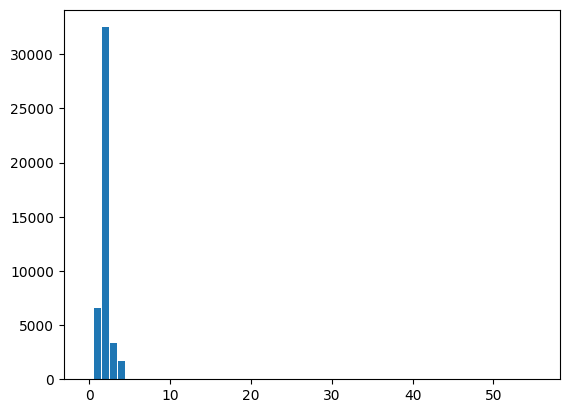

In [158]:
#Plotting the cancellations to family size
plt.bar(x, y)